<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(_3_6)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-3.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_-3.6_n20.csv',
 'data_multi_delta_-3.6_n30.csv',
 'data_multi_delta_-3.6_n60.csv',
 'data_multi_delta_-3.6_n120.csv',
 'data_multi_delta_-3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.6_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,99.228289,55.335619,-0.000409,164.563499,164.564236,-0.000738
1,0.0,1.0,33.406957,94.469779,-0.000412,137.876324,137.876497,-0.000173
2,0.0,2.0,44.138893,38.361556,-0.001026,92.499423,92.500150,-0.000728
3,0.0,3.0,58.897070,62.000926,-0.001642,130.896355,130.897924,-0.001570
4,0.0,4.0,25.563286,54.594485,0.000074,90.157845,90.157328,0.000517
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,36.081661,46.753544,0.001403,92.836607,92.835280,0.001327
119996,999.0,116.0,40.076408,42.587943,-0.000014,92.664337,92.664483,-0.000146
119997,999.0,117.0,66.144565,85.563509,0.000023,161.708097,161.708147,-0.000051
119998,999.0,118.0,39.530506,87.415590,0.000011,136.946106,136.945950,0.000156


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,99.228289,55.335619,-0.000409,164.563499,164.564236,-0.000738
1,0.0,1.0,33.406957,94.469779,-0.000412,137.876324,137.876497,-0.000173
2,0.0,2.0,44.138893,38.361556,-0.001026,92.499423,92.500150,-0.000728
3,0.0,3.0,58.897070,62.000926,-0.001642,130.896355,130.897924,-0.001570
4,0.0,4.0,25.563286,54.594485,0.000074,90.157845,90.157328,0.000517
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,36.081661,46.753544,0.001403,92.836607,92.835280,0.001327
119996,999.0,116.0,40.076408,42.587943,-0.000014,92.664337,92.664483,-0.000146
119997,999.0,117.0,66.144565,85.563509,0.000023,161.708097,161.708147,-0.000051
119998,999.0,118.0,39.530506,87.415590,0.000011,136.946106,136.945950,0.000156


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    99.228289  55.335619 -0.000409  164.563499  164.564236 -0.000738
      1.0    33.406957  94.469779 -0.000412  137.876324  137.876497 -0.000173
      2.0    44.138893  38.361556 -0.001026   92.499423   92.500150 -0.000728
      3.0    58.897070  62.000926 -0.001642  130.896355  130.897924 -0.001570
      4.0    25.563286  54.594485  0.000074   90.157845   90.157328  0.000517
...                ...        ...       ...         ...         ...       ...
999.0 115.0  36.081661  46.753544  0.001403   92.836607   92.835280  0.001327
      116.0  40.076408  42.587943 -0.000014   92.664337   92.664483 -0.000146
      117.0  66.144565  85.563509  0.000023  161.708097  161.708147 -0.000051
      118.0  39.530506  87.415590  0.000011  136.946106  136.945950  0.000156
      119.0  61.766720  56.118208 -0.000283  127.884645  127.885146 -0.000501

[120000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    99.228289  55.335619 -0.000409  164.563499  164.564236 -0.000738
      1.0    33.406957  94.469779 -0.000412  137.876324  137.876497 -0.000173
      2.0    44.138893  38.361556 -0.001026   92.499423   92.500150 -0.000728
      3.0    58.897070  62.000926 -0.001642  130.896355  130.897924 -0.001570
      4.0    25.563286  54.594485  0.000074   90.157845   90.157328  0.000517
...                ...        ...       ...         ...         ...       ...
999.0 115.0  36.081661  46.753544  0.001403   92.836607   92.835280  0.001327
      116.0  40.076408  42.587943 -0.000014   92.664337   92.664483 -0.000146
      117.0  66.144565  85.563509  0.000023  161.708097  161.708147 -0.000051
      118.0  39.530506  87.415590  0.000011  136.946106  136.945950  0.000156
      119.0  61.766720  56.118208 -0.000283  127.884645  127.885146 -0.000501

[120000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,99.228289,55.335619,-0.000409,164.563499,164.564236,-0.000738
1,0.0,1.0,33.406957,94.469779,-0.000412,137.876324,137.876497,-0.000173
2,0.0,2.0,44.138893,38.361556,-0.001026,92.499423,92.500150,-0.000728
3,0.0,3.0,58.897070,62.000926,-0.001642,130.896355,130.897924,-0.001570
4,0.0,4.0,25.563286,54.594485,0.000074,90.157845,90.157328,0.000517
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,36.081661,46.753544,0.001403,92.836607,92.835280,0.001327
119996,999.0,116.0,40.076408,42.587943,-0.000014,92.664337,92.664483,-0.000146
119997,999.0,117.0,66.144565,85.563509,0.000023,161.708097,161.708147,-0.000051
119998,999.0,118.0,39.530506,87.415590,0.000011,136.946106,136.945950,0.000156


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    99.228289  55.335619 -0.000409  164.563499  164.564236 -0.000738
      1.0    33.406957  94.469779 -0.000412  137.876324  137.876497 -0.000173
      2.0    44.138893  38.361556 -0.001026   92.499423   92.500150 -0.000728
      3.0    58.897070  62.000926 -0.001642  130.896355  130.897924 -0.001570
      4.0    25.563286  54.594485  0.000074   90.157845   90.157328  0.000517
...                ...        ...       ...         ...         ...       ...
999.0 115.0  36.081661  46.753544  0.001403   92.836607   92.835280  0.001327
      116.0  40.076408  42.587943 -0.000014   92.664337   92.664483 -0.000146
      117.0  66.144565  85.563509  0.000023  161.708097  161.708147 -0.000051
      118.0  39.530506  87.415590  0.000011  136.946106  136.945950  0.000156
      119.0  61.766720  56.118208 -0.000283  127.884645  127.885146 -0.000501

[120000 rows x 6 columns]

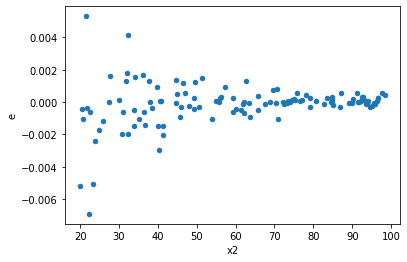

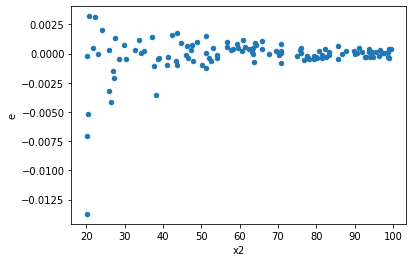

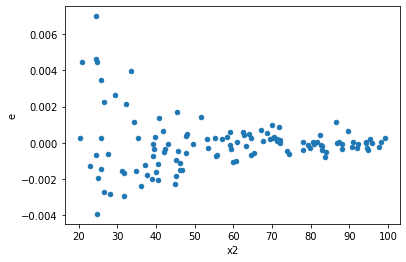

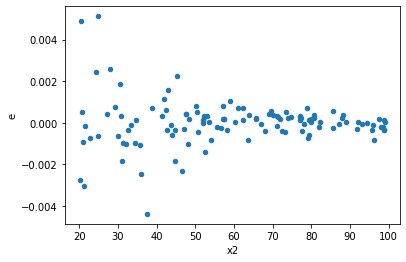

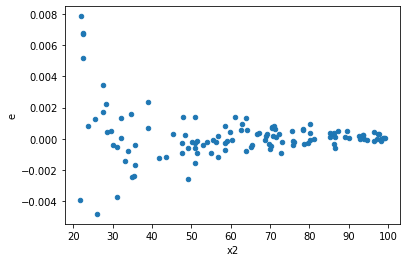

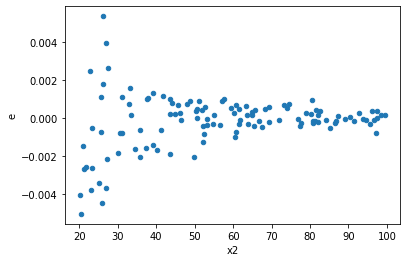

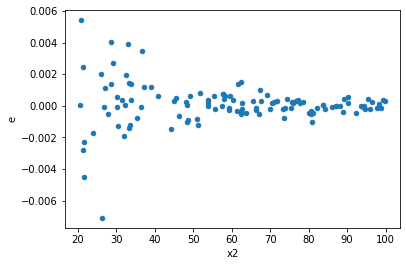

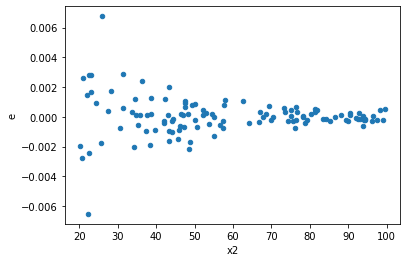

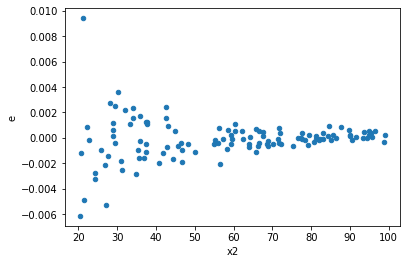

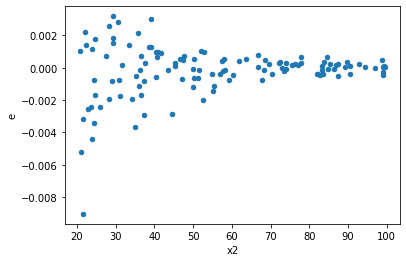

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
78.0,46.0,46.0,4.799159587040199e-05,5.2505084839126785e-05,1.0432955624000433e-06,1.1414148878071041e-06,1.0940474865831336,0.7618066744068126,0.6190966627965937,0.3809033372034063,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,46.0,0.0001409653437317657,1.4703716659775833e-05,3.0644639941688197e-06,3.1964601434295287e-07,0.10430731604325834,2.7607313805094216e-12,Reject005=0 : Heteroscedasticity
1.0,46.0,46.0,7.754418103271452e-05,6.582877297910373e-06,1.6857430659285767e-06,1.431060282154429e-07,0.08489195720737798,5.2728969642854417e-14,Reject005=0 : Heteroscedasticity
2.0,46.0,46.0,0.00025158638842035874,5.463201254120347e-06,5.46926931348606e-06,1.1876524465479014e-07,0.021715011246921084,1.7780315081410257e-26,Reject005=0 : Heteroscedasticity
3.0,46.0,46.0,0.00016033555951174504,8.762461172626078e-06,3.485555641559675e-06,1.9048828636143649e-07,0.05465076617632162,7.288283109378397e-18,Reject005=0 : Heteroscedasticity
4.0,46.0,46.0,0.00020112773051734285,1.2251951302844162e-05,4.372341967768323e-06,2.6634676745313396e-07,0.060916270826153925,6.817515454539694e-17,Reject005=0 : Heteroscedasticity
5.0,46.0,46.0,0.00012042356507913841,1.2022018897938323e-05,2.617903588676922e-06,2.613482369117027e-07,0.0998311160281449,1.2032293208447678e-12,Reject005=0 : Heteroscedasticity
6.0,46.0,46.0,0.00011969521170703676,6.31374754604069e-06,2.6020698197181903e-06,1.372553814356672e-07,0.05274853902672459,3.493358401918389e-18,Reject005=0 : Heteroscedasticity
7.0,46.0,46.0,0.00013099247875830668,1.1482212797092809e-05,2.847662581702319e-06,2.4961332167593065e-07,0.08765551202583594,9.851406768251389e-14,Reject005=0 : Heteroscedasticity
8.0,46.0,46.0,0.0001708308131677919,1.3486054316895094e-05,3.7137133297346068e-06,2.9317509384554553e-07,0.07894392157256164,1.262896512670709e-14,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    997
Reject005=1 : Homoscedasticity        3
Name: Result_test, dtype: int64